# Análisis Exploratorio de Datos

---

## Objetivos:

- Cargar y explorar los datasets disponibles.
- Revisar estructura, tipos de datos y valores nulos.
- Analizar de forma general:
  - Usuarios registrados
  - Distribución por país, plan y canal de adquisición
  - Variables demográficas básicas
- Obtener primeras conclusiones generales.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use("default")


Cargamos los archivos CSV proporcionados por la plataforma.  
Cada archivo representa una parte distinta del negocio:

- `users.csv`: información de usuarios y su ciclo de vida  
- `sessions.csv`: sesiones e interacciones de los usuarios  
- `transactions.csv`: información de pagos y monetización  
- `data_dictionary.csv`: descripción de los campos  


In [4]:
users = pd.read_csv("../data/raw/users.csv")
sessions = pd.read_csv("../data/raw/sessions.csv")
transactions = pd.read_csv("../data/raw/transactions.csv")
data_dictionary = pd.read_csv("../data/raw/data_dictionary.csv")


Analisis de estructura y contenido.


In [5]:
users.head()

,user_id,signup_date,country,acquisition_channel,utm_campaign,first_device,gender,age,plan,marketing_opt_in,is_churned,churn_date
0,1,2024-03-04,AR,affiliate,NaN,mobile,male,23,free,False,False,NaN
1,2,2025-07-07,US,organic,retargeting,desktop,male,27,basic,True,False,NaN
2,3,2025-04-13,FR,organic,spring_sale,mobile,female,38,basic,True,False,NaN
3,4,2024-11-09,US,organic,NaN,mobile,female,33,enterprise,True,False,NaN
4,5,2024-11-05,ES,affiliate,brand,desktop,unknown,28,free,NaN,True,2025-02-21


In [6]:
sessions.head()

,session_id,user_id,session_start,duration_sec,pages_viewed,device,traffic_source,primary_action
0,1,30602,2024-04-04 13:53:00,103.0,5.0,desktop,paid_search,add_to_cart
1,2,9439,2024-10-07 00:37:00,379.0,4.0,desktop,organic,add_to_cart
2,3,23658,2024-10-18 13:33:00,222.0,3.0,mobile,paid_social,checkout
3,4,3423,2025-04-15 16:53:00,246.0,7.0,mobile,referral,search
4,5,24425,2024-04-11 03:35:00,924.0,4.0,mobile,organic,add_to_cart


In [7]:
transactions.head()

,transaction_id,user_id,transaction_ts,category,currency,payment_method,discount_code,gross_revenue,tax_amount,net_revenue,status,refund_ts,refund_reason
0,1,27165,2025-11-21 20:33:00,subscription,EUR,card,WELCOME10,20.68,3.60,17.09,paid,NaN,NaN
1,2,15038,2024-10-04 02:36:00,subscription,EUR,card,NONE,183.37,1.43,181.94,paid,NaN,NaN
2,3,24924,2024-11-28 19:31:00,consulting,GBP,invoice,NONE,722.02,3.73,718.29,paid,NaN,NaN
3,4,17344,2024-09-09 23:28:00,analytics_addon,EUR,card,NONE,55.20,10.20,45.00,paid,NaN,NaN
4,5,29840,2024-12-07 10:46:00,analytics_addon,EUR,card,NONE,25.00,0.00,25.00,paid,NaN,NaN


El archivo `data_dictionary.csv` sirve como referencia para entender
el significado de cada columna.


In [8]:
data_dictionary.head()

,file,field,description
0,users.csv,user_id,Identificador único del usuario
1,users.csv,signup_date,Fecha/hora de alta
2,users.csv,country,País (código ISO-2 simplificado)
3,users.csv,acquisition_channel,Canal de adquisición principal
4,users.csv,utm_campaign,Campaña UTM (puede ser nula)


Revision del tamaño de los dataset y tipo de datos de las columnas.


In [9]:
print("Users:", users.shape)
print("Sessions:", sessions.shape)
print("Transactions:", transactions.shape)

Users: (50000, 12)
Sessions: (320000, 8)
Transactions: (90000, 13)


In [10]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              50000 non-null  int64 
 1   signup_date          50000 non-null  object
 2   country              50000 non-null  object
 3   acquisition_channel  50000 non-null  object
 4   utm_campaign         33094 non-null  object
 5   first_device         50000 non-null  object
 6   gender               50000 non-null  object
 7   age                  50000 non-null  int64 
 8   plan                 50000 non-null  object
 9   marketing_opt_in     47557 non-null  object
 10  is_churned           50000 non-null  bool  
 11  churn_date           18861 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 4.2+ MB


Analisis sobre valores null y columnas que aparecen.


In [11]:
users.isnull().sum()

user_id                    0
signup_date                0
country                    0
acquisition_channel        0
utm_campaign           16906
first_device               0
gender                     0
age                        0
plan                       0
marketing_opt_in        2443
is_churned                 0
churn_date             31139
dtype: int64

Iniciamos analisis de características básicas de usuarios:
- País
- Plan contratado
- Canal de adquisición

In [12]:
users['country'].value_counts().head(10)

country
ES    9940
US    4991
UK    4632
FR    4500
DE    4036
IT    3429
PT    2502
MX    2456
CO    2058
BR    2016
Name: count, dtype: int64

In [13]:
users['plan'].value_counts()

plan
free          27220
basic         15204
pro            6570
enterprise     1006
Name: count, dtype: int64

In [14]:
users['acquisition_channel'].value_counts()

acquisition_channel
organic        15136
paid_search    10881
paid_social     5970
referral        4949
affiliate       4024
email           3994
display         3011
influencer      2035
Name: count, dtype: int64

Visualizacion de distribución de usuarios según su plan.

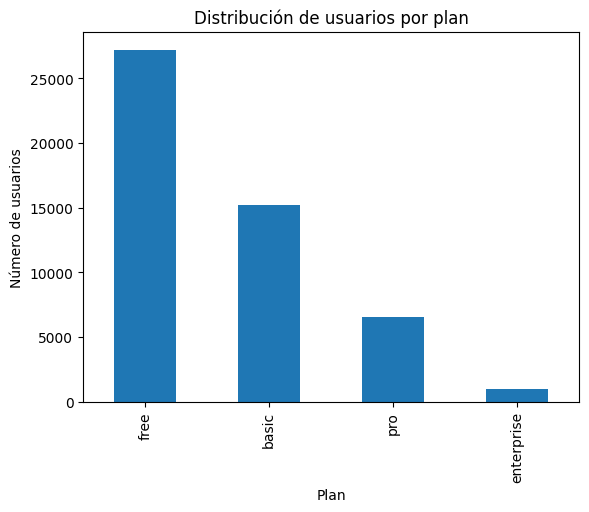

In [15]:
users['plan'].value_counts().plot(kind='bar')
plt.title("Distribución de usuarios por plan")
plt.xlabel("Plan")
plt.ylabel("Número de usuarios")
plt.show()

Analiaia de evolución de registros de usuarios a lo largo del tiempo.

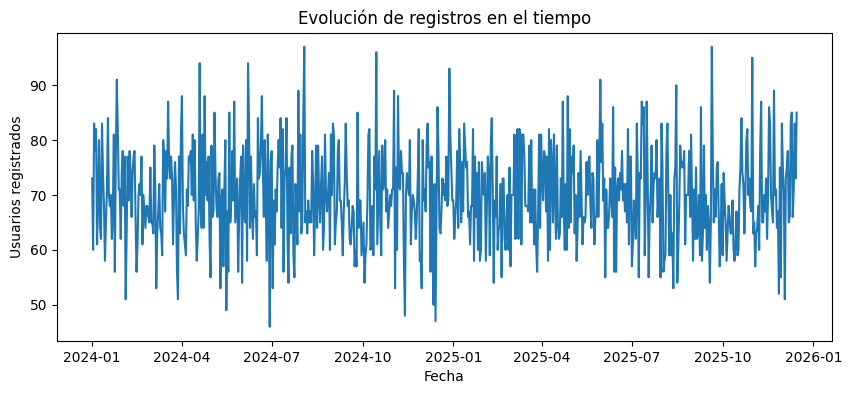

In [16]:
users['signup_date'] = pd.to_datetime(users['signup_date'])  # Conversion de signup_date a datetime

signups_by_date = users.groupby(users['signup_date'].dt.date).size() # Agrupa por fecha

signups_by_date.plot(figsize=(10,4))
plt.title("Evolución de registros en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Usuarios registrados")
plt.show()


A partir del análisis inicial podemos destacar:

- Existen diferencias claras entre los tipos de plan.
- Ciertos paises concentran la mayoria de los usuarios.
- Volumen de registros varía en el tiempo, posibles campañas o estacionalidad.
- Valores null en algunas columnas.

Este análisis sirve como base para profundizar en:
- Engagement de usuarios
- Retención y churn
- Monetización y revenue
